In [1]:
import csv
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import re
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/rabnawazjansher/Documents/textMiningProjects/fn/data/newdata.csv")
data = df
data = data.dropna() 
data.shape

(79996, 12)

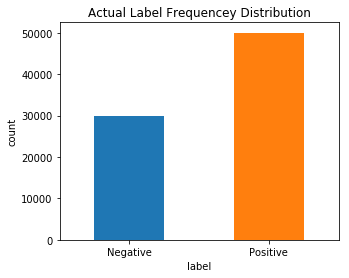

In [2]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize= (5,4))

data.groupby('label').Review_Text.count().plot.bar(ylim=0)
plt.title('Actual Label Frequencey Distribution')
plt.ylabel('count')


plt.xticks(rotation='horizontal')
plt.savefig('actual_label.png')

# Multinomial Naive Bayes


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

stop_words = set(stopwords.words('english'))

precesion = []
accuracy = []
recal = []
f1 = []
model = []


## splitting data into test and train
n = np.random.rand(len(data)) < 0.70

## setting predictor and response variables
train = data[n]
test = data[~n]

X_train = train.clean_data
y_train = train.label

X_test = test.clean_data
y_test = test.label



vectorizer = CountVectorizer(stop_words=stop_words)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


# create TF-IDF features
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
xtrain_tfidf = tfidf_transformer.fit_transform(X_train_counts)


print(train.shape)
print(test.shape)

(55924, 12)
(24072, 12)


Precision :  [0.6870748299319728]
Accuracy :  [0.848786972416085]
Recall :  [0.8159306622351026]
F1-Score :  [0.8294258477955121]
model :  ['Naive Bayes']


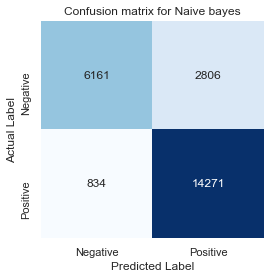

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

nb_classifier = MultinomialNB(alpha=0.9)
nb_classifier.fit(xtrain_tfidf,y_train)
y_pred_nb = nb_classifier.predict(X_test_counts)



conf_mat_nb = confusion_matrix(y_test,y_pred_nb)

TN = conf_mat_nb[0][0]
TP = conf_mat_nb[1][1]
total = conf_mat_nb[0][0]+conf_mat_nb[0][1]+conf_mat_nb[1][0]+conf_mat_nb[1][1]
FP = conf_mat_nb[0][1]
FN = conf_mat_nb[1][0]




precision_nb = conf_mat_nb[0][0]/(conf_mat_nb[0][0]+FP)

accuracy_nb = (TP + TN)/total
#precision_nb = precision_score(y_test,y_pred_nb,average="macro")
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb =  f1_score(y_test,y_pred_nb,average="macro")








precesion.append(precision_nb)
accuracy.append(accuracy_nb)
recal.append(recall_nb)
f1.append(f1_nb)
model.append('Naive Bayes')








print("Precision : ",precesion)
print("Accuracy : ",accuracy)
print("Recall : ",recal)
print("F1-Score : ",f1)
print("model : ",model)


import pandas as pd
import seaborn as sn
from pylab import savefig

data1 = {'y_Actual':    y_test,
         'y_Predicted': y_pred_nb
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(confusion_matrix, annot=True,cbar=False,fmt='g',cmap="Blues")
ax.set_title('Confusion matrix for Naive bayes')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('nb_conf.png')

AUC: 0.92


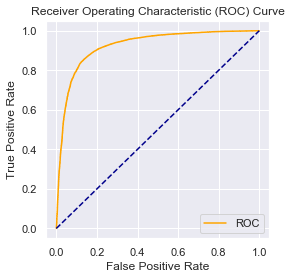

In [5]:
from sklearn.metrics import roc_auc_score,roc_curve
prob = nb_classifier.predict_proba(X_test_counts)

probs = prob[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label='Positive')
plot_roc_curve(fpr, tpr)

In [6]:
y_test

4        Positive
6        Positive
10       Positive
13       Positive
14       Positive
16       Positive
19       Positive
23       Positive
26       Positive
30       Positive
36       Positive
38       Positive
39       Positive
42       Positive
44       Positive
48       Positive
52       Positive
63       Positive
64       Positive
66       Positive
68       Positive
69       Positive
70       Positive
72       Positive
73       Positive
79       Positive
80       Positive
81       Positive
86       Positive
87       Positive
           ...   
79890    Negative
79893    Negative
79894    Negative
79895    Negative
79897    Negative
79904    Negative
79906    Negative
79921    Negative
79930    Negative
79943    Negative
79945    Negative
79947    Negative
79953    Negative
79954    Negative
79955    Negative
79956    Negative
79958    Negative
79959    Negative
79960    Negative
79965    Negative
79967    Negative
79970    Negative
79977    Negative
79978    Negative
79979    N

# Different Alpha values

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score
r = np.arange(0, 1, 0.01)
pp = []
err = []
recall_f = []
f1Score = []

for i in r:
    nb_classifier = MultinomialNB(alpha=i)
    nb_classifier.fit(xtrain_tfidf,y_train)
    y_pred_nb = nb_classifier.predict(X_test_counts)
    conf_mat_nb = confusion_matrix(y_test,y_pred_nb)
    
    FP = conf_mat_nb[0][1]
    FN = conf_mat_nb[1][0]
    total = conf_mat_nb[0][0]+conf_mat_nb[0][1]+conf_mat_nb[1][0]+conf_mat_nb[1][1]
    error = ((FP+FN)/total) * 100
    precision_rf = conf_mat_nb[0][0]/(conf_mat_nb[0][0]+FP)
    recall_rf = conf_mat_nb[0][0]/(conf_mat_nb[0][0]+FN)
    f1_rf= f1_score(y_test,y_pred_nb,average="macro")
    
    pp.append(precision_rf)
    err.append(error)
    recall_f.append(recall_rf)
    f1Score.append(f1_rf)
    


column_names = ['precision','recall','f1','error','alpha']
mydf = pd.DataFrame(columns = column_names)
mydf['precision'] = pp
mydf['error'] = err
mydf['recall'] = recall_f
mydf['alpha'] = r
mydf['f1'] = f1Score


mydf[['error']].idxmin()


mydf.iloc[10,:]

# Implementation of Linear Svm

In [7]:

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score,recall_score


from sklearn.svm import LinearSVC
svm_classifier = LinearSVC()
svm_classifier.fit(xtrain_tfidf,y_train)

y_pred_svm = svm_classifier.predict(X_test_counts)





from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
conf_mat_svm = confusion_matrix(y_test,y_pred_svm)
accuracy_svm = accuracy_score(y_test,y_pred_svm)

accuracy_svm = accuracy_score(y_test,y_pred_svm)
precision_svm = precision_score(y_test,y_pred_svm,average="macro")
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm =  f1_score(y_test,y_pred_svm,average="macro")

precesion.append(precision_svm)
accuracy.append(accuracy_svm)
recal.append(recall_svm)
f1.append(f1_svm)
model.append('SVM')



print("Precision : ",precision_svm)
print("Accuracy : ",accuracy_svm)
print("Recall : ",recall_svm)
print("F1-Score : ",f1_svm)


print("Precision : ",precesion)
print("Accuracy : ",accuracy)
print("Recall : ",recal)
print("F1-Score : ",f1)
print("model : ",model)


Precision :  0.8612786154281132
Accuracy :  0.8651545363908275
Recall :  0.8470087773009476
F1-Score :  0.8530377059037013
Precision :  [0.6870748299319728, 0.8612786154281132]
Accuracy :  [0.848786972416085, 0.8651545363908275]
Recall :  [0.8159306622351026, 0.8470087773009476]
F1-Score :  [0.8294258477955121, 0.8530377059037013]
model :  ['Naive Bayes', 'SVM']


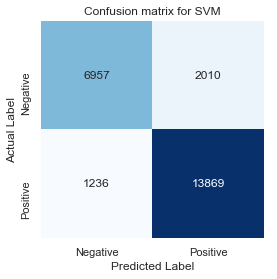

In [8]:
import pandas as pd
import seaborn as sn
data2 = {'y_Actual':    y_test,
        'y_Predicted': y_pred_svm
        }

df = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(confusion_matrix, annot=True,cbar=False,fmt='g',cmap="Blues")
ax.set_title('Confusion matrix for SVM')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('svm_conf.png')

In [10]:
column_names = ['model','precision','recall','f1-score','accuracy']
result = pd.DataFrame(columns = column_names)
result['precision'] = [100 * i for i in precesion] 
result['model'] = model 
result['recall'] = [100 * i for i in recal] 
result['f1-score'] = [100 * i for i in f1] 
result['accuracy'] = [100 * i for i in accuracy] 
result

,model,precision,recall,f1-score,accuracy
0,Naive Bayes,68.707483,81.593066,82.942585,84.878697
1,SVM,86.127862,84.700878,85.303771,86.515454
